In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**(01)**

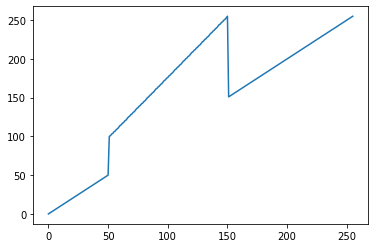

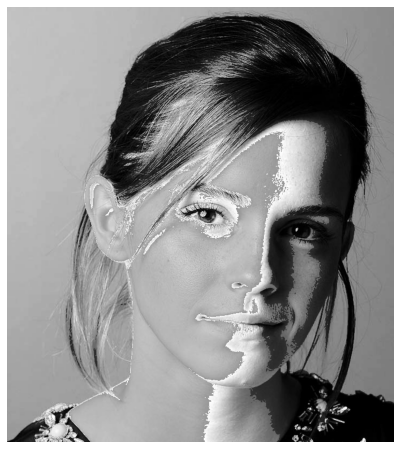

In [21]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)

g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.imshow(img)
plt.show()

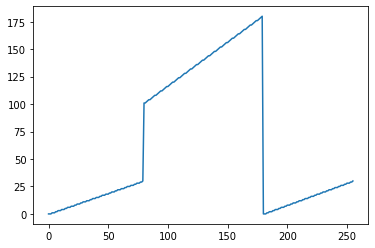

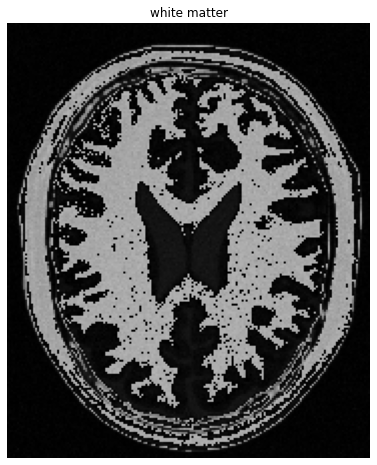

In [33]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,80)
t2 = np.linspace(31,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,30,76)

t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('white matter')
ax.imshow(img)
plt.show()

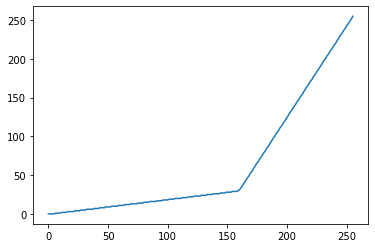

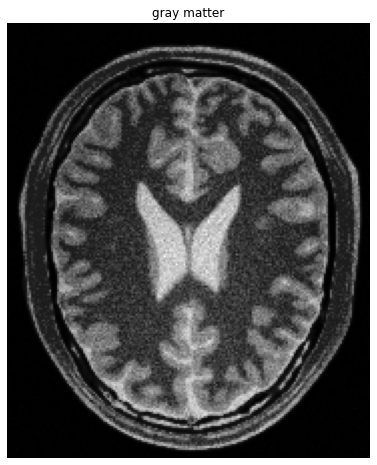

In [44]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,160)
t2 = np.linspace(31,255,96)

t = np.concatenate((t1,t2), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('gray matter')
ax.imshow(img)
plt.show()

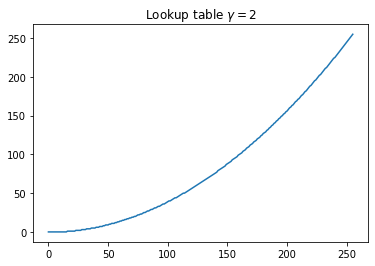

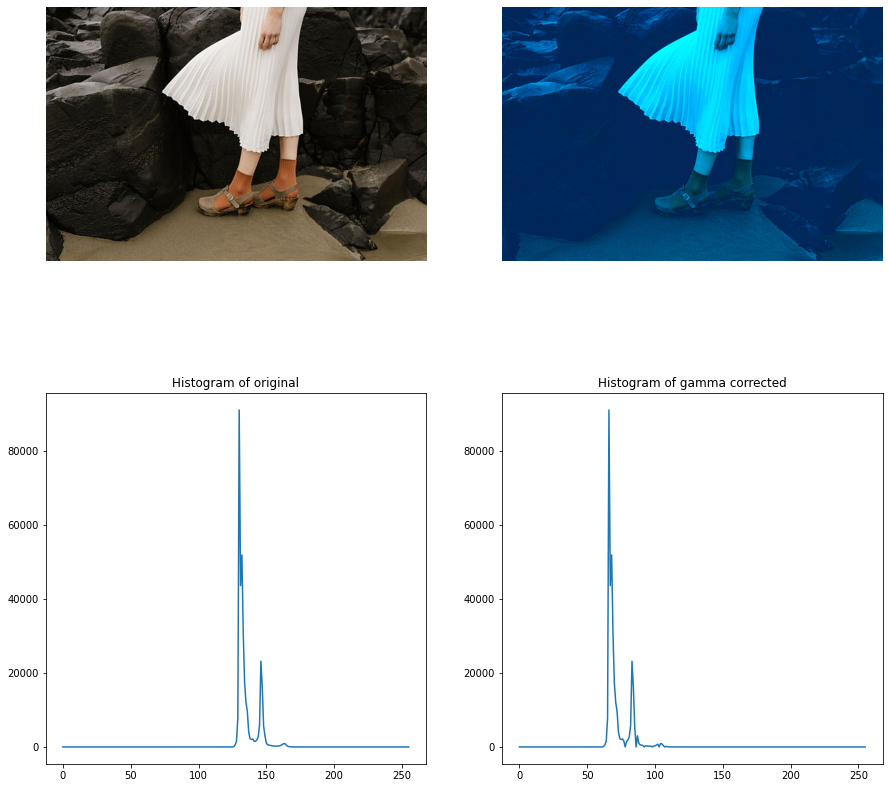

In [70]:
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None

orig = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2LAB)
gamma = 2
t = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

fig, ax = plt.subplots()
ax.plot(t)
ax.set_title('Lookup table $\gamma=2$')

g = cv.LUT(lab, t)

img = cv.cvtColor(g, cv.COLOR_LAB2RGB)
color = ('l','a','b')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([lab],[i],None,[256],[0,256])
    hist_gamma = cv.calcHist([g],[i],None,[256],[0,256])

fig, axarr = plt.subplots(2,2, figsize = (15,15))
axarr[0,0].imshow(orig)
axarr[0,0].axis('off')
axarr[0,1].imshow(img)
axarr[0,1].axis('off')
axarr[1,0].set_title('Histogram of original')
axarr[1,1].set_title('Histogram of gamma corrected')
axarr[1,0].plot(hist_orig)
axarr[1,1].plot(hist_gamma)